In [82]:
import numpy as np
import pandas as pd
import time as time
import operator
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image, clear_output
from scipy.spatial.distance import pdist, squareform

In [86]:
filepath = '/Users/alfredogarbuno/github-repos/hashcode-2015/data/right_angle.in'
f = open(filepath, "r+")
dimstr = f.readline().split()
paint = np.empty([int(dimstr[0]), int(dimstr[1])])

for i in range(int(dimstr[0])):
    paint[i] = np.array(list(f.readline().split()[0].replace(".", "0").replace("#", "1")), np.int32)
    
f.close()

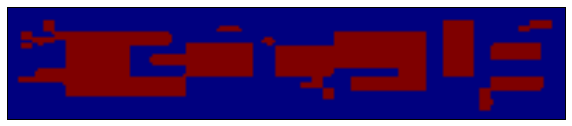

In [87]:
plt.figure(figsize=(10,10))
plt.imshow(paint)
fig = plt.gca()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [88]:
dim = np.array(dimstr, np.int32)
print dim

[ 40 200]


In [90]:
density = paint.sum() / dim.prod()
print density

0.324


In [105]:
minsize = int(dim.min() * density)
minsize = 12
print minsize

12


In [106]:
indices = np.arange(1,dim.prod()+1).reshape(dim)
print indices

[[   1    2    3 ...,  198  199  200]
 [ 201  202  203 ...,  398  399  400]
 [ 401  402  403 ...,  598  599  600]
 ..., 
 [7401 7402 7403 ..., 7598 7599 7600]
 [7601 7602 7603 ..., 7798 7799 7800]
 [7801 7802 7803 ..., 7998 7999 8000]]


In [107]:
# Generate the indices, in the test example we can only have sqp(1) so we lose 2 rows and 2 columns, first and last 
# in both cases.
row, col = np.indices((dim[0]-2*minsize, dim[1]-2*minsize))
centers = indices[row+minsize, col+minsize]
centers

array([[2413, 2414, 2415, ..., 2586, 2587, 2588],
       [2613, 2614, 2615, ..., 2786, 2787, 2788],
       [2813, 2814, 2815, ..., 2986, 2987, 2988],
       ..., 
       [5013, 5014, 5015, ..., 5186, 5187, 5188],
       [5213, 5214, 5215, ..., 5386, 5387, 5388],
       [5413, 5414, 5415, ..., 5586, 5587, 5588]])

In [108]:
# Test case, let's take the center in cell 9
# We access that center by knowing it is in the second row, so the first row in the center matrix
# And we know that it is the first column

def discrete_kernel(center, minsize):
    dist = np.empty((2*minsize+1,2*minsize+1))
    decay = np.logspace(0,1,minsize+1 )
    
    for xstep in range(-minsize,minsize+1):
        for ystep in range(-minsize,minsize+1):
            dist[1+xstep][1+ystep] = 1 * paint[center[0]+xstep][center[1]+ystep]
            
    return (dist.sum()+0.0)/np.array(dist.shape).prod()

In [109]:
# Computes the densities of zeroes for every possible center
cands = []
cands = [ (ycoord, discrete_kernel([row+minsize, ycoord%dim[1]-1], minsize)) for row in range(centers.shape[0]) 
        for ycoord in centers[row]]
print len(cands)

2816


In [110]:
# Given a threshold filter the centers most probable to a successful square paint
threshold = 0.6

cands = [(key, value) for (key,value) in cands if value > threshold]
cands = sorted(cands, key=lambda element: (-element[1], element[0]))
#cands = sorted(cands, key=operator.itemgetter( 1))
#cands.reverse()

In [120]:
print cands[0][1]
print (1-cands[0][1])*(2*minsize+1)**2
print (cands[0][1])*(2*minsize+1)**2/(2*minsize + 1 )**2

0.8848
72.0
0.8848


In [98]:
def paint_square(center, minsize):
    for xstep in range(-minsize,minsize+1):
        for ystep in range(-minsize,minsize+1):
            paint[center[0]+xstep][center[1]+ystep] = 0.0

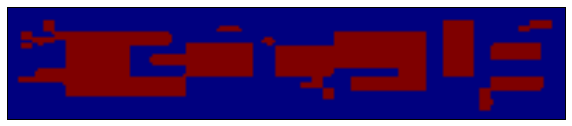

In [99]:
plt.figure(figsize=(10,10))
plt.imshow(paint)
fig = plt.gca()
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [79]:
cands[0][0]

97814

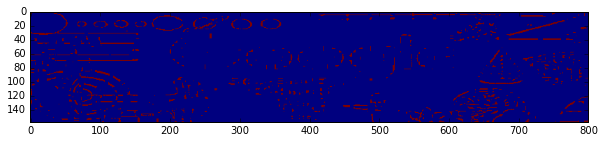

In [80]:
fig=plt.figure()
n = len(cands)
i = 0
paints = 1
plt.figure(figsize=(10,10))
plt.imshow(paint)
clear_output(wait=True)
display(plt.gcf())
time.sleep(2)

for cand in cands:
    center = ( cand[0] // dim[1], cand[0] % dim[1] - 1)
    if cand[0] == cands[0][0]:
        paint_square(center, minsize)
        plt.imshow(paint)
        clear_output(wait=True)
        display(plt.gcf())
        time.sleep(1)
    else:
        if discrete_kernel(center, minsize) > threshold:
            paint_square(center, minsize)
            paints += 1
            plt.imshow(paint)
            clear_output(wait=True)
            display(plt.gcf())
            time.sleep(0.001)
            
clear_output(wait=True)

In [81]:
paints

141

In [104]:
cands[1000]

(4835, 1.0)